In [10]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation
%matplotlib inline
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from heamy.dataset import Dataset
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
import pymorphy2
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import StratifiedShuffleSplit

In [488]:
def rmse(x,y):
    return np.mean((x - y) ** 2) ** 0.5

## Подготовка данных (urls)

In [2]:
urls_train_df = pd.read_csv('url_domain_train.csv', header=None, delimiter='\t')
urls_train_df.columns = ['id', 'url', 'count']
urls_train_df = urls_train_df[['id', 'url']]

In [490]:
urls_train_df.head()

,id,url
0,000000014B60815F65B38258011B6C01,login.rutracker.org
1,000000014B60815F65B38258011B6C01,rutracker.org
2,000000014C03DA2A47AC433A0C755201,admin.tour-spb.net
3,000000014C03DA2A47AC433A0C755201,czinfo.ru
4,000000014C03DA2A47AC433A0C755201,forumsostav.ru


In [491]:
urls_train_df = pd.DataFrame(urls_train_df.groupby('id')['url'].apply(lambda x: x.tolist()))
urls_train_df['id'] = urls_train_df.index
urls_train_df.index = range(len(urls_train_df))
urls_train_df.columns = ['urls', 'id']

In [492]:
urls_train_df.head()

,urls,id
0,"[id.rambler.ru, mail.rambler.ru, r0.ru]",000000013CB5719C0000A2C90002C101
1,"[1prime.ru, autorambler.ru, chellak.ru, docs.c...",00000001442BE24000001B7D00F50801
2,[bosch-korolev.ru],00000001448580F800003F1B31FB0901
3,"[aptekanizkihcen.ua, colady.ru, gorod.dp.ua, i...",0000000145BDB2FF000157971645E901
4,"[astrorok.ru, diets.ru, edaplus.info, eshzdoro...",000000014602771F0000DB9359714C01


In [493]:
urls_test_df = pd.read_csv('url_domain_test.csv', header=None, delimiter='\t')
urls_test_df.columns = ['id', 'url', 'count']
urls_test_df = urls_test_df[['id', 'url']]

In [494]:
urls_test_df = pd.DataFrame(urls_test_df.groupby('id')['url'].apply(lambda x: x.tolist()))
urls_test_df['id'] = urls_test_df.index
urls_test_df.index = range(len(urls_test_df))
urls_test_df.columns = ['urls', 'id']

In [495]:
urls_test_df.head()

,urls,id
0,"[1000bankov.ru, 1tv.ru, 4put.ru, argumenti.ru,...",000000014A02348E701552980349FF01
1,"[autorambler.ru, bilettorg.ru, dsol-druzhba.ru...",000000014A10EA183BF8594A0B2AB201
2,"[photosight.ru, rambler.ru]",000000014A4FE5C33A929D4C26943601
3,"[base.consultant.ru, dogovor-obrazets.ru, fd.r...",000000014B7BB9957784A9BC0AC9F401
4,"[assessor.ru, audit-it.ru, base.garant.ru, com...",000000014C7749F896D82C2B01E8B801


In [12]:
age_train_df = pd.read_csv('age_profile_train.csv', header=None, delimiter='\t')
age_train_df.columns = ['id', 'age']

In [497]:
age_train_df.head()

,id,age
0,000000013CB5719C0000A2C90002C101,53
1,00000001442BE24000001B7D00F50801,48
2,00000001448580F800003F1B31FB0901,28
3,0000000145BDB2FF000157971645E901,44
4,000000014602771F0000DB9359714C01,48


In [498]:
urls_train_df = urls_train_df.merge(age_train_df, on='id', how='left')

In [499]:
urls_train_df.head()

,urls,id,age
0,"[id.rambler.ru, mail.rambler.ru, r0.ru]",000000013CB5719C0000A2C90002C101,53
1,"[1prime.ru, autorambler.ru, chellak.ru, docs.c...",00000001442BE24000001B7D00F50801,48
2,[bosch-korolev.ru],00000001448580F800003F1B31FB0901,28
3,"[aptekanizkihcen.ua, colady.ru, gorod.dp.ua, i...",0000000145BDB2FF000157971645E901,44
4,"[astrorok.ru, diets.ru, edaplus.info, eshzdoro...",000000014602771F0000DB9359714C01,48


## Подготовка данных (titles)

In [3]:
titles_train_df = pd.read_csv('title_unify_train.csv', header=None, delimiter='\t')
titles_train_df.columns = ['id', 'titles', 'count']
titles_train_df = titles_train_df[['id', 'titles']]

In [501]:
titles_test_df = pd.read_csv('title_unify_test.csv', header=None, delimiter='\t')
titles_test_df.columns = ['id', 'titles', 'count']
titles_test_df = titles_test_df[['id', 'titles']]

In [502]:
titles_train_df = pd.DataFrame(titles_train_df.groupby('id')['titles'].apply(lambda x: x.tolist()) )

In [503]:
titles_test_df = pd.DataFrame(titles_test_df.groupby('id')['titles'].apply(lambda x: x.tolist()) )

In [504]:
titles_train_df['id'] = titles_train_df.index
titles_train_df.index = range(len(titles_train_df))
titles_train_df.columns = ['titles', 'id']

In [505]:
titles_test_df['id'] = titles_test_df.index
titles_test_df.index = range(len(titles_test_df))
titles_test_df.columns = ['titles', 'id']

In [506]:
titles_train_df = titles_train_df.merge(age_train_df, on='id', how='left')

In [507]:
titles_train_df.head()

,titles,id,age
0,[бесплатный надёжный почта рамблер электронный...,000000013CB5719C0000A2C90002C101,53
1,[24-х 34-х до договор неделя новость предложит...,00000001442BE24000001B7D00F50801,48
2,"[авто бош контакт королёв сервис, авто бош кор...",00000001448580F800003F1B31FB0901,28
3,[ua втрать війни донбасі за на новини озвучить...,0000000145BDB2FF000157971645E901,44
4,"[black walnut грецкий орех чёрный, inmoment ru...",000000014602771F0000DB9359714C01,48


In [508]:
titles_test_df.head()

,titles,id
0,[11-й гектар дом коммунизм на набережная недос...,000000014A02348E701552980349FF01
1,[20-летний выглядеть девушка как королева ната...,000000014A10EA183BF8594A0B2AB201
2,[медийный портал рамблер],000000014A4FE5C33A929D4C26943601
3,"[бесплатно код онлайн срочно статистика, или и...",000000014B7BB9957784A9BC0AC9F401
4,[bank privat автокредитование банковский банко...,000000014C7749F896D82C2B01E8B801


## TfIdf for titles

In [509]:
morph = pymorphy2.MorphAnalyzer()
morph.parse('домики мамы')[0].normal_form

'домики мама'

In [510]:
def new_titles(title_arr):
    new_title = []
    for one_title in title_arr:
        new_title += one_title.split() 
    return list(set(new_title))

In [511]:
titles_train_df.titles = titles_train_df.titles.apply(new_titles)

In [512]:
titles_train_df.titles[0]

['поиск',
 'электронный',
 'бесплатный',
 'рамблер',
 'надёжный',
 'профиль',
 'почта',
 'чемпионат']

In [513]:
titles_train_df.shape

(114156, 3)

In [514]:
titles_X, titles_y = titles_train_df.titles.values, titles_train_df.age.values

In [515]:
titles_X_kaggle = titles_test_df.titles.values

In [516]:
titles_X = list(map(lambda x: ' '.join(x), titles_X))
tfidfvect = TfidfVectorizer(max_features=1500).fit(titles_X)

In [517]:
titles_X = tfidfvect.transform(titles_X).todense()

In [518]:
titles_X_kaggle = list(map(lambda x: ' '.join(x), titles_X_kaggle))
titles_X_kaggle = tfidfvect.transform(titles_X_kaggle).todense()

In [519]:
titles_X.shape

(114156, 1500)

## TFIDF for Urls

In [391]:
urls_X, urls_y = urls_train_df.urls.values, urls_train_df.age.values

In [392]:
urls_X_kaggle = urls_test_df.urls.values

In [393]:
urls_X = list(map(lambda x: ' '.join(x), urls_X))
tfidfvect = TfidfVectorizer(max_features=1500).fit(urls_X)

In [394]:
urls_X = tfidfvect.transform(urls_X).todense()

In [395]:
urls_X_kaggle = list(map(lambda x: ' '.join(x), urls_X_kaggle))
urls_X_kaggle = tfidfvect.transform(urls_X_kaggle).todense()

## Algorythms

In [336]:
clf_sgd = SGDRegressor(n_iter=50)

In [ ]:
clf_linear = LinearRegression()

In [520]:
reg_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000)

In [ ]:
error = []
min_error = 10000
need_index = -1
for w in np.linspace(0, 1, 100):
     error += [rmse(urls_y_test, y_pred_titles * w + (1-w) * y_pred_urls)]

pd.Series(error, index=np.linspace(0, 1, 100)).plot(figsize=(6,3))
for i, err in enumerate(error):
    if err < min_error:
        min_error = err
        need_index = i
print(min_error, need_index / 100)

In [399]:
cross_val_score(clf, urls_X, urls_y, scoring='neg_mean_squared_error', cv=3).mean()

-138.3880833207586

In [400]:
nsplit = int(0.8 * titles_X.shape[0])
titles_X_train = titles_X[:nsplit, :]
titles_y_train = titles_y[:nsplit]
titles_X_test = titles_X[nsplit:, :]
titles_y_test = titles_y[nsplit:]

In [401]:
nsplit = int(0.8 * urls_X.shape[0])
urls_X_train = urls_X[:nsplit, :]
urls_y_train = urls_y[:nsplit]
urls_X_test = urls_X[nsplit:, :]
urls_y_test = urls_y[nsplit:]

In [202]:
clf.fit(titles_X_train, titles_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [203]:
rmse(titles_y_test, clf.predict(titles_X_test))

11.334325574602111

In [273]:
clf.fit(urls_X_train, urls_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [274]:
rmse(urls_y_test, clf.predict(urls_X_test))

11.201361641952845

In [109]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9], #
ns_estimators = [10, 30, 50, 70, 90, 100, 110, 130], #
learning_rates = [0.01, 0.05, 0.1, 0.2] #

In [204]:
reg = xgb.XGBRegressor(max_depth=5, n_estimators=150)

In [117]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [10, 30, 50, 70, 90, 100, 110, 130],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [205]:
reg.fit(titles_X_train, titles_y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=150, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [206]:
pred_X_xgb = reg.predict(titles_X_test)

In [207]:
pred_X_lin = clf.predict(titles_X_test)

In [340]:
reg.fit(urls_X_train, urls_y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=150, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [339]:
clf.fit(urls_X_train, urls_y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [341]:
pred_X_xgb = reg.predict(urls_X_test)

In [342]:
pred_X_lin = clf.predict(urls_X_test)

In [406]:
clf_linear_urls = LinearRegression()
clf_linear_titles = LinearRegression()
reg_xgb_urls = xgb.XGBRegressor(max_depth=5, n_estimators=200)
reg_xgb_titles = xgb.XGBRegressor(max_depth=5, n_estimators=200)

In [407]:
clf_linear_urls.fit(urls_X_train, urls_y_train)
reg_xgb_urls.fit(urls_X_train, urls_y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [408]:
reg_xgb_titles.fit(titles_X_train, titles_y_train)
clf_linear_titles.fit(titles_X_train, titles_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [409]:
y_pred_titles = 0.5 * reg_xgb_titles.predict(titles_X_test) + 0.5 * clf_linear_titles.predict(titles_X_test)
y_pred_urls = 0.5 * reg_xgb_urls.predict(urls_X_test) + 0.5 * clf_linear_urls.predict(urls_X_test)

In [ ]:
error = []
min_error = 10000
need_index = -1
for w in np.linspace(0, 1, 100):
     error += [rmse(urls_y_test, y_pred_titles * w + (1-w) * y_pred_urls)]

pd.Series(error, index=np.linspace(0, 1, 100)).plot(figsize=(6,3))
for i, err in enumerate(error):
    if err < min_error:
        min_error = err
        need_index = i
print(min_error, need_index / 100)

## Write answer

In [436]:
clf_linear_urls = LinearRegression()
clf_linear_titles = LinearRegression()
reg_xgb_urls = xgb.XGBRegressor(max_depth=5, n_estimators=200)
reg_xgb_titles = xgb.XGBRegressor(max_depth=5, n_estimators=200)

In [437]:
clf_linear_titles.fit(titles_X, titles_y)
reg_xgb_titles.fit(titles_X, titles_y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [438]:
clf_linear_urls.fit(urls_X, urls_y)
reg_xgb_urls.fit(urls_X, urls_y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [439]:
y_pred_urls = clf_linear_urls.predict(urls_X_kaggle) * 0.5 + 0.5 * reg_xgb_urls.predict(urls_X_kaggle)

In [440]:
y_pred_titles = clf_linear_titles.predict(titles_X_kaggle) * 0.5 + 0.5 * reg_xgb_titles.predict(titles_X_kaggle)

In [441]:
random_sol = pd.read_csv('sample_submission.csv')

In [442]:
test_df1 = pd.read_csv('url_domain_test.csv', header=None, delimiter='\t')
test_df1.columns = ['id', 'url', 'count']
test_df1 = test_df1[['id', 'url']]

In [443]:
test_df1 = pd.DataFrame(test_df1.groupby('id')['url'].apply(lambda x: x.tolist()))
test_df1['id'] = test_df1.index
test_df1.index = range(len(test_df1))
test_df1.columns = ['urls', 'id']

In [444]:
ls

age_blending_demo.ipynb    solution.csv
age_prediction.ipynb       title_unify_test.csv
age_profile_train.csv      title_unify_train.csv
age_sample_solution.ipynb  url_domain_test.csv
sample_submission.csv      url_domain_train.csv


In [451]:
test_df2 = pd.read_csv('title_unify_test.csv', header=None, delimiter='\t')
test_df2.columns = ['id', 'title', 'count']
test_df2 = test_df2[['id', 'title']]

In [452]:
test_df2 = pd.DataFrame(test_df2.groupby('id')['title'].apply(lambda x: x.tolist()))
test_df2['id'] = test_df2.index
test_df2.index = range(len(test_df2))
test_df2.columns = ['titles', 'id']

In [453]:
y_pred_titles.shape

(19960,)

In [454]:
test_df2.shape

(19960, 2)

In [455]:
test_df1['age'] = y_pred_urls
test_df2['age'] = y_pred_titles

In [456]:
test_df1 = test_df1[['id', 'age']]
test_df1.columns = ['Id', 'age']
test_df2 = test_df2[['id', 'age']]
test_df2.columns = ['Id', 'age']

In [457]:
test_df.head()

,Id,age
0,000000014A02348E701552980349FF01,41.808592
1,000000014A10EA183BF8594A0B2AB201,40.836732
2,000000014A4FE5C33A929D4C26943601,35.112334
3,000000014B7BB9957784A9BC0AC9F401,34.347959
4,000000014C7749F896D82C2B01E8B801,36.731989


In [458]:
random_sol = pd.read_csv('sample_submission.csv')
miss_idx = set(random_sol.Id.values) - set(test_df1.Id.values)
age = [urls_y.mean() for i in range(len(miss_idx))]
miss_df = pd.DataFrame(list(zip(list(miss_idx), age)))
miss_df.columns = ['Id', 'age']

In [459]:
miss_df

,Id,age
0,06210D9556EFE0E30000054678B0D901,36.041331
1,00000001545483F30F717F5A0721E401,36.041331
2,000022D456544DE3771122F857A6F201,36.041331
3,000000465684D839B64B58DA9701F701,36.041331
4,00000046549F9C26429C4B0159BFEE01,36.041331


In [460]:
test_df1_last = test_df1.append(miss_df, ignore_index=True)

In [461]:
random_sol = pd.read_csv('sample_submission.csv')
miss_idx = set(random_sol.Id.values) - set(test_df2.Id.values)
age = [urls_y.mean() for i in range(len(miss_idx))]
miss_df = pd.DataFrame(list(zip(list(miss_idx), age)))
miss_df.columns = ['Id', 'age']

In [462]:
miss_df

,Id,age
0,00000046569323B3B9B443367DC16401,36.041331
1,060458FC4F26763C00000F979D2A7E01,36.041331
2,0000004654B561B02F4A0174E0EC2001,36.041331
3,0000004656C8659C34EC56F3481DC101,36.041331
4,05F9DAFE4D3838F50000024A4318F701,36.041331
5,05F9DAFE4E0C341900008CF2B767AF01,36.041331
6,000000465684B22F9C5E2F5092605901,36.041331
7,000000465705245378FF65D832218001,36.041331
8,060E6C2B503325370000837052DE5001,36.041331
9,05F9DAFE4E254F2B0000DDF205C6D101,36.041331


In [463]:
test_df2_last = test_df2.append(miss_df, ignore_index=True)

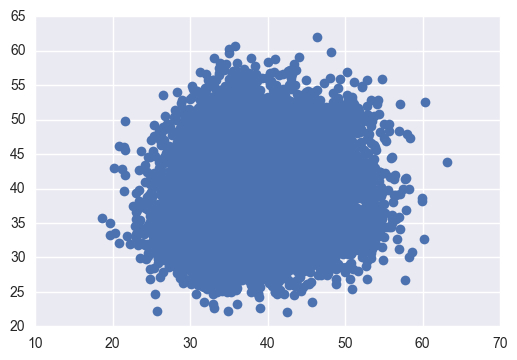

In [481]:
plt.plot(test_df1_last.age.values, test_df2_last.age.values, 'o')

In [482]:
y_pred_last = test_df1_last.age.values

In [483]:
test_df_last['age'] = y_pred_last

In [484]:
test_df_last.to_csv('solution.csv', index=False)

In [479]:
test_df_last.age.describe()

count    19979.000000
mean        37.912097
std          4.370983
min         22.072751
25%         35.002505
50%         37.229247
75%         40.580898
max         59.244731
Name: age, dtype: float64

# One more thing...

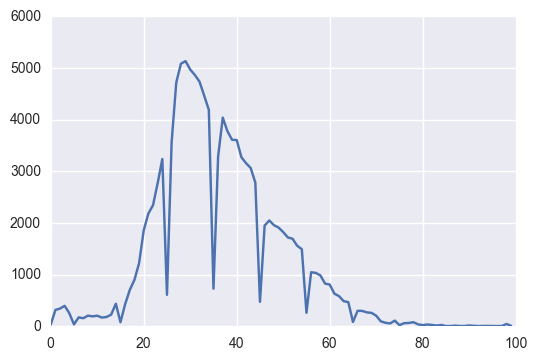

In [13]:
plt.plot(age_train_df.groupby('age')['id'].count())

## Снижение размерности

In [53]:
topk = 300000
X, y = train_df.urls.values[:topk], train_df.age.values[:topk]

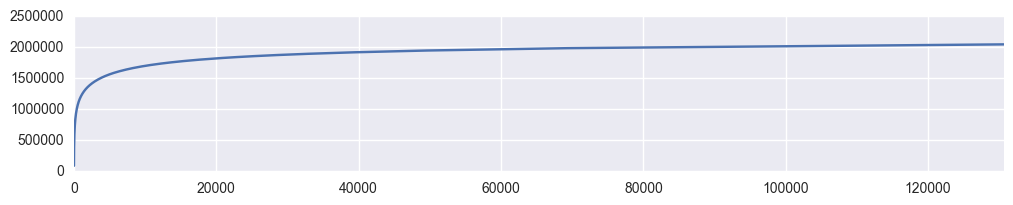

In [54]:
url_frequency = pd.Series([j for i in X for j in i]).value_counts()
url_frequency.index = range(len(url_frequency))

url_frequency.cumsum().plot(figsize=(12,2))

In [55]:
X = list(map(lambda x: ' '.join(x), X))
hw = HashingVectorizer(n_features=1000, non_negative=True).fit(X)
X = hw.transform(X).todense()

In [58]:
X

matrix([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.33333333,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [56]:
X.shape

(118603, 1000)

In [57]:
%%time

transformer = sklearn.decomposition.NMF(n_components=100)
X_nmf = transformer.fit_transform(X)

CPU times: user 15min 26s, sys: 16.7 s, total: 15min 42s
Wall time: 7min 39s


## Холдаут

In [16]:
itrain, itest = cross_validation.train_test_split(range(len(X)), test_size=1./3, random_state=0)
len(itrain), len(itest)

(79068, 39535)

## Обучение модели

In [17]:
rmse(y[itest], np.mean(y[itrain]))

12.546984607126014

In [156]:
reg = LinearRegression()
reg.fit(X[itrain, :], y[itrain])

pred_X = reg.predict(X[itest, :])
print rmse(y[itest], pred_X)

11.9053939779


In [157]:
reg = LinearRegression()
reg.fit(X_nmf[itrain, :], y[itrain])

pred_X_nmf = reg.predict(X_nmf[itest, :])
print rmse(y[itest], pred_X_nmf)

12.0059923586


11.8794101395


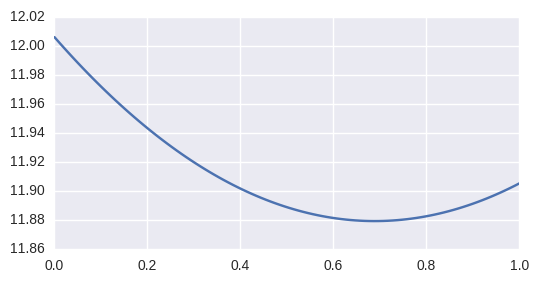

In [169]:
error = []
for w in np.linspace(0, 1, 100):
     error += [rmse(y[itest], pred_X * w + (1-w) * pred_X_nmf)]

pd.Series(error, index=np.linspace(0, 1, 100)).plot(figsize=(6,3))
print min(error)